# Mean median mode

In [1]:
def calculate_mean(data):
    mean=sum(data)/len(data)
    return mean

data_set=[10,15,20,30,85,56]
mean_result=calculate_mean(data_set)
print(mean_result)

36.0


In [2]:
def calculate_median(data):
    data.sort()
    n=len(data)
    mid=n//2

    if n%2==0:
        median=(data[mid-1]+data[mid])/2
    else:
        median=data[mid]
    return median
    

data_set=[10,15,20,30,85,56,78]
median_result=calculate_median(data_set)
print(median_result)

30


In [3]:
from statistics import mode


In [4]:
data_set=[10,15,20,30,30,85,56,78]
mode_result=mode(data_set)
print(mode_result)

30


# Percentile

In [5]:
import numpy as np

In [6]:
def calculate_percentile(data,percentile):
    return np.percentile(data,percentile)

data_set_1=[10,15,20,25,30]
percentile_result_1=calculate_percentile(data_set_1,percentile=75)
print("75th percentile :",percentile_result_1)

data_set_2=[10,15,20,25,30]
percentile_result_2=calculate_percentile(data_set_2,percentile=50)
print("50th percentile :",percentile_result_2)



75th percentile : 25.0
50th percentile : 20.0


# Data distribution

In [7]:
import numpy as np
import matplotlib.pyplot as plt

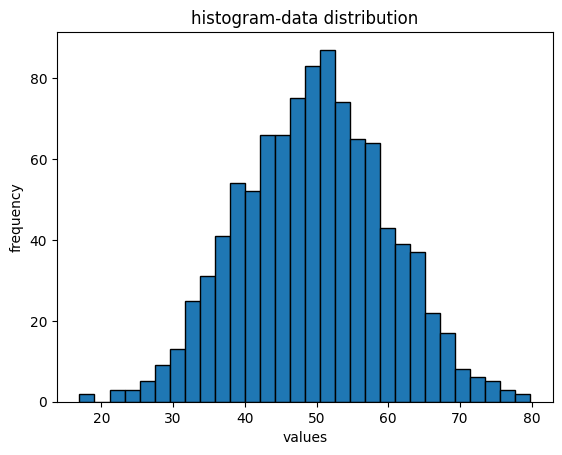

In [8]:
data_distribution=np.random.normal(loc=50,scale=10,size=1000)
plt.hist(data_distribution,bins=30,edgecolor='black')
plt.title('histogram-data distribution')
plt.xlabel('values')
plt.ylabel('frequency')
plt.show()

# Normal distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt

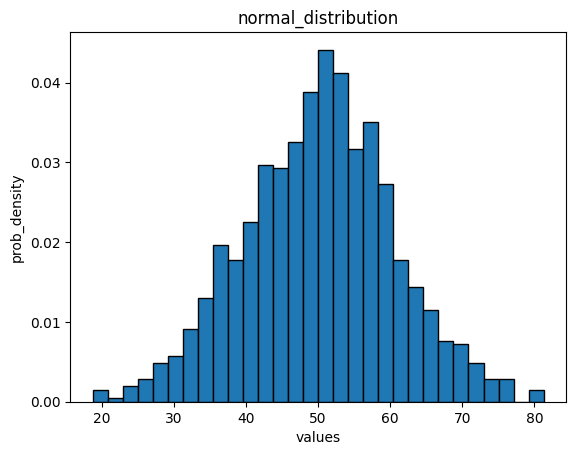

In [10]:
mean=50
std_dev=10
sample_size=1000
normal_data=np.random.normal(loc=mean,scale=std_dev,size=sample_size)

plt.hist(normal_data,bins=30,edgecolor='black',density=True)
plt.title('normal_distribution')
plt.xlabel('values')
plt.ylabel('prob_density')
plt.show()


# LinearRegression

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [12]:
np.random.seed(42)
X=3*np.random.rand(100,2)
y=4+2*X[:,0]+X[:,1]+np.random.rand(100)

model=LinearRegression()
model.fit(X,y)

coef=model.coef_
intercept=model.intercept_

print(f"coefficient:{coef}")
print(f"intercept:{intercept}")

coefficient:[2.00018194 0.97607971]
intercept:4.552284048030681


# Scalling

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


np.random.seed(42)
data=np.random.rand(100,1)*100+500

scalar=MinMaxScaler()

scaled_data=scalar.fit_transform(data)

print("orginal data")
print(data[:5])
print("\nscaled data:")
print(scaled_data[:5])

orginal data
[[537.45401188]
 [595.07143064]
 [573.19939418]
 [559.86584842]
 [515.60186404]]

scaled data:
[[0.3760253 ]
 [0.96314049]
 [0.74026683]
 [0.60439946]
 [0.15335431]]


# Test train

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
np.random.rand(42)
X=np.random.rand(100,1)
y=2*X.squeeze()+1+0.1*np.random.rand(100)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'trainig set size: {len(X_train)}')
print(f'tset set size: {len(X_test)}')

trainig set size: 80
tset set size: 20


# Decision tree

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
iris=load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

print(f"accuracy:{accuracy}")


accuracy:1.0


# Confusion matrix

In [18]:
import seaborn as sns
from sklearn.datasets import load_digits

from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

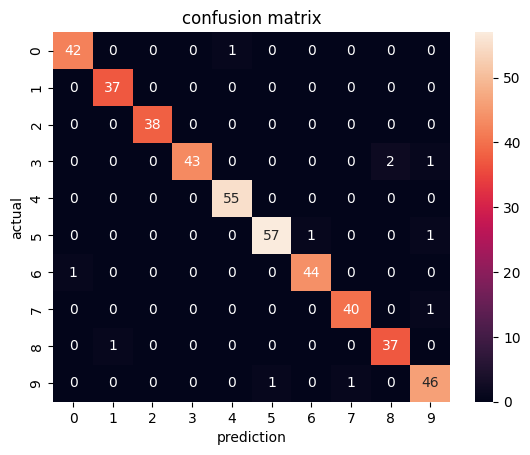

In [19]:
X,y=load_digits(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

# Hierarchial clustering 

In [20]:
from sklearn.cluster import  AgglomerativeClustering
from sklearn.datasets import make_blobs

from scipy.cluster.hierarchy import dendrogram,linkage

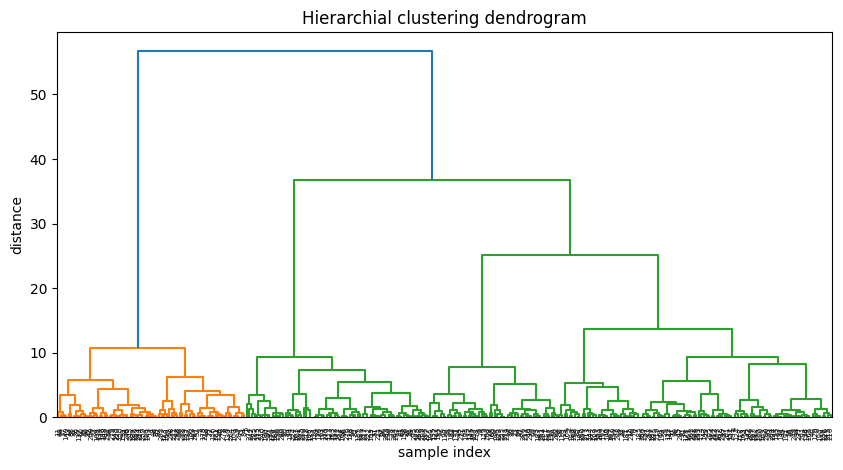

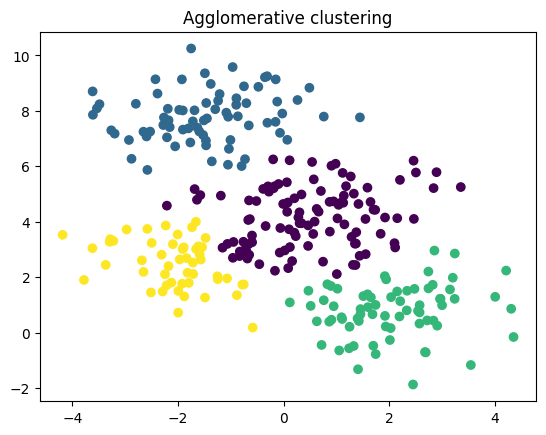

In [21]:
X,y=make_blobs(n_samples=300,centers=4,random_state=0)
linkage_matrix=linkage(X,method='ward')
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.title('Hierarchial clustering dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()


clusters=AgglomerativeClustering(n_clusters=4,linkage='ward',metric='euclidean')
y_pred=clusters.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='viridis')
plt.title('Agglomerative clustering')
plt.show()

# Grid search

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [23]:
iris=datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear','rbf','poly']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [24]:
sv_classifier=SVC()
grid_search=GridSearchCV(sv_classifier,param_grid,cv=5,scoring='accuracy',refit=True,verbose=2)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_
y_pred=grid_search.predict(X_test)

print("best parametrs:",best_params)
print("accuracy:",accuracy_score(y_test,y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

# Categorical variable

In [25]:
import numpy as np
import pandas as pd

data={'color':['blue','green','yellow','red','black']}
df=pd.DataFrame(data)
df_encoded=pd.get_dummies(df,columns=['color'],prefix='color')
print("original dataframe")
print(df)
print("\nencoded dataframe")
print(df_encoded)   

original dataframe
    color
0    blue
1   green
2  yellow
3     red
4   black

encoded dataframe
   color_black  color_blue  color_green  color_red  color_yellow
0        False        True        False      False         False
1        False       False         True      False         False
2        False       False        False      False          True
3        False       False        False       True         False
4         True       False        False      False         False


# K-means clustering

In [26]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

c:\Users\FAUZAN\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\FAUZAN\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\FAUZAN\miniconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\FAUZAN\miniconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\FAUZAN\miniconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi

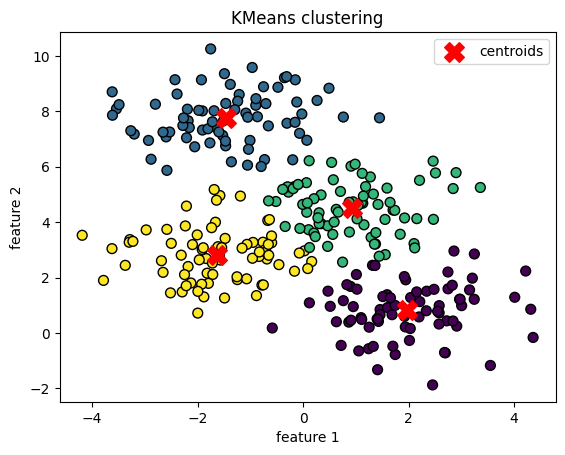

In [27]:
X,y=make_blobs(n_samples=300,centers=4,random_state=0)
kmeans_model=KMeans(n_clusters=4,random_state=42)
kmeans_model.fit(X)
clusters_centr= kmeans_model.cluster_centers_
labels=kmeans_model.labels_
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',edgecolor='black',s=50)
plt.scatter(clusters_centr[:,0],clusters_centr[:,1],c='red',s=200,marker='X',label='centroids')
plt.title('KMeans clustering')  
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

# Knn CLASSIFIER

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
        

In [29]:
iris=load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)    
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy}")

accuracy:1.0


# Bootstrap aggregation (Bagging)

In [30]:
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split    
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [31]:
base_classifier=DecisionTreeClassifier(random_state=42) 
bagging_classifier=BaggingClassifier(base_classifier,n_estimators=10,random_state=42)  
bagging_classifier.fit(X_train,y_train)
y_pred=bagging_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy}")


accuracy:1.0


# Cross validation

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold

from sklearn.model_selection import  KFold,cross_val_score
from sklearn.svm import SVC
import numpy as np

In [33]:
iris=load_iris()
X,y=iris.data,iris.target

svm=SVC(kernel='linear',C=1)
KFold=KFold(n_splits=5,shuffle=True,random_state=42)
accuracy_score=cross_val_score(svm,X,y,cv=KFold)
print(f"accuracy:{accuracy_score}")
print(f"mean_accuracy:{accuracy_score.mean()}")

accuracy:[1.         1.         0.96666667 0.93333333 0.96666667]
mean_accuracy:0.9733333333333334


# Logistic regression

In [34]:
from sklearn.linear_model import  LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



accuracy:0.9

Confusion matrix:
 [[97  7]
 [13 83]]

classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



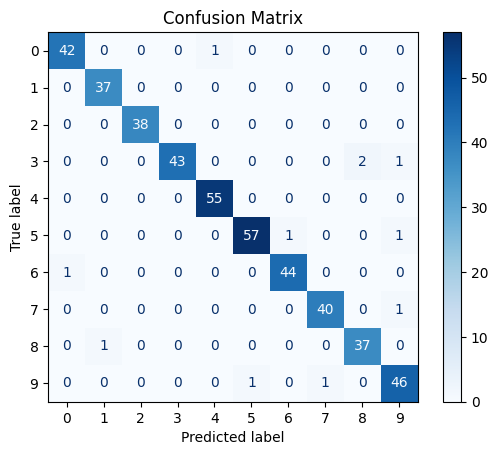

In [35]:
X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
logistic=LogisticRegressionCV(cv=5,random_state=42)
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
accuracy=logistic.score(X_test,y_test)
print(f"accuracy:{accuracy}")
print("\nConfusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test,y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()